In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading initial CSV file
bank_train = pd.read_csv(r"C:\Users\Bader Ale\Documents\WGU MSDA\Data Cleaning - D206\D206 textbook data files\bank_marketing_training.csv")

In [4]:
# View first 5 rows
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
# Create a contingecny table of 'previous outcome' and 'response' columns
crosstab_1 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])

In [12]:
# Show crosstab_1
crosstab_1

response,no,yes
previous_outcome,,
failure,2390,385
nonexistent,21176,2034
success,320,569


<AxesSubplot: xlabel='previous_outcome'>

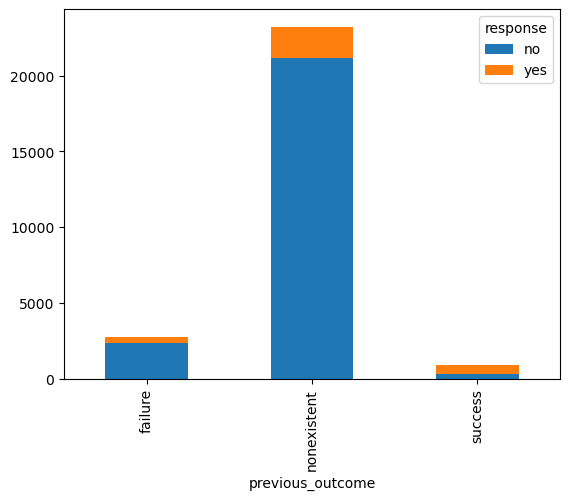

In [6]:
# Create a bar graph based on contingency table
crosstab_1.plot(kind='bar', stacked=True)

In [7]:
# Create a normalized version the contingency table
crosstab_norm = crosstab_1.div(crosstab_1.sum(1), axis=0)

<AxesSubplot: xlabel='previous_outcome'>

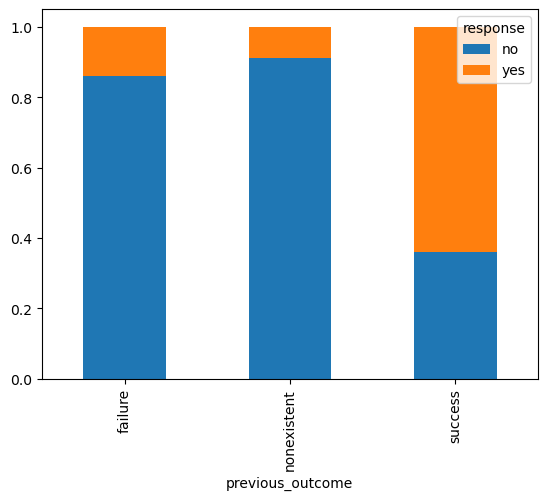

In [8]:
# Create a bar graph of the normalized contingecny table
crosstab_norm.plot(kind='bar', stacked=True)

In [9]:
# Modifying crosstab_1 by including best practices (target varible as row and predictor as column)
crosstab_2 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])

In [11]:
# Plot crosstab_2 
crosstab_2

previous_outcome,failure,nonexistent,success
response,,,
no,2390,21176,320
yes,385,2034,569


In [13]:
# Caltulating column proportions of crosstab_2
round(crosstab_2.div(crosstab_2.sum(0), axis = 1)*100, 1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


In [16]:
# Creating the two variables for the overlay histogram with age and response
bt_age_y = bank_train[bank_train.response == "yes"]['age']
bt_age_n = bank_train[bank_train.response == "no"]['age']


### The result is two variables, bt_age_y and bt_age_n, which have age values
### from only those records which have response = “yes” and response = “no,”
### respectively

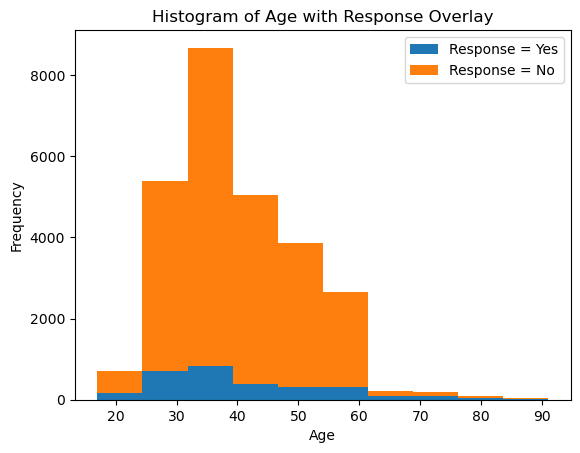

In [17]:
# Creating a stacked histogram of the two variables, bt_age_n and gt_age_y
plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

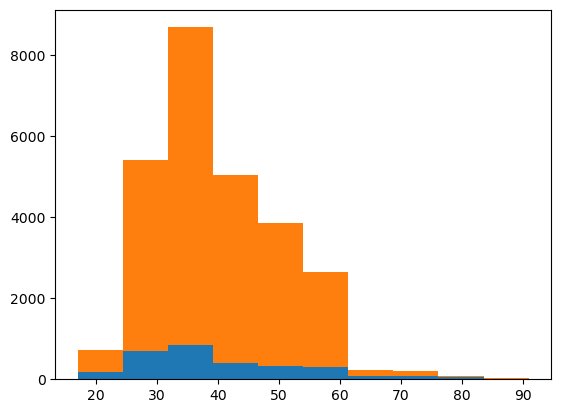

In [18]:
# To create a normalized histogram we first save the data generated by original histogram
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins =10, stacked = True)